In [11]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import yasa

from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

events = np.loadtxt('p1_high1_trig.txt', delimiter=',')
# events = np.squeeze(events.values.tolist())
# data = np.loadtxt('p1_high1.txt', delimiter=',')

print(events.shape, data.shape)

fs = 256
window_size = 154
channels = 8

(39032,) (39032, 8)


In [48]:
non_target = np.zeros((channels, window_size))
target = np.zeros((channels, window_size))
third = np.zeros((channels, window_size))

non_target_count = 0 
target_count = 0
third_count = 0

avg_non_target = np.zeros((channels, window_size))
avg_target = np.zeros((channels, window_size))
avg_third = np.zeros((channels, window_size))

for i in range(events.shape[0]):
    if (events[i] == 1):
        non_target_count += 1
        trial = data[i: i + window_size, :].T
        non_target = np.append(non_target, trial, axis=1)
        avg_non_target += trial
        
    elif (events[i] == 2):
        target_count += 1
        trial = data[i: i + window_size, :].T
        target = np.append(target, trial, axis=1)
        avg_target += trial
        
    elif (events[i] == -1):
        third_count += 1
        trial = data[i: i + window_size, :].T
        third = np.append(target, trial, axis=1)
        avg_third += trial
    
    
    
avg_non_target /= non_target_count
non_target = non_target[:, window_size:]

avg_target /= target_count
target = target[:, window_size:]

avg_third /= third_count
third = target[:, window_size:]

all_trials = np.append(target, non_target, axis=1)

print(non_target.shape, all_trials.shape, target_count, non_target_count)

(8, 9240) (8, 18480) 60 60


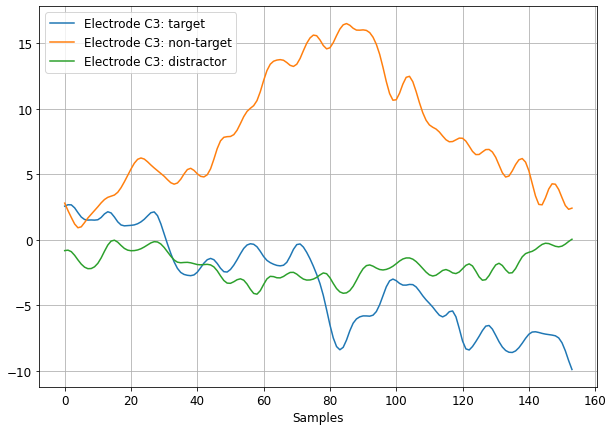

In [45]:
# plot
time = [i for i in range(window_size)]

plt.figure(1, figsize=(10, 7))
plt.clf()
plt.plot(time, avg_target[1, :], label='Electrode C3: target')
plt.plot(time, avg_non_targ[1, :], label='Electrode C3: non-target' )
plt.plot(time, avg_third[1, :], label='Electrode C3: distractor' )

plt.xlabel('Samples')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.show()

In [43]:
# Create function to process eeg

data_bp = yasa.bandpower(data.T, fs, relative=False)['TotalAbsPow']
data_bp = data_bp.values.reshape((data_bp.shape[0], 1))
